# Physicochemical features analysis: split into categorical and continuous variables 
Then a different correlation analysis will be applied based on this slip

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [6, 6]

In [3]:
%cd ..

/home/belu/VS Workplace/licentiate-thesis-repo


In [10]:
import src.data.notebook_utils as utils

results = 'notebooks/results/'

df = utils.read_data()

columns_by_type = utils.get_columns(df.columns)
phy_chem_cols = list(columns_by_type['_feat_'])
df_amines_fcp = df[phy_chem_cols].drop_duplicates()

In [11]:
df_amines_feat = df_amines_fcp.nunique()

In [23]:
df_amines_fcp.shape

(27, 67)

In [12]:
feature_count_df = df_amines_feat.value_counts().sort_values()

[Text(0, 0.5, 'Cantidad de features'),
 Text(0.5, 0, 'Cantidad de valores distintos')]

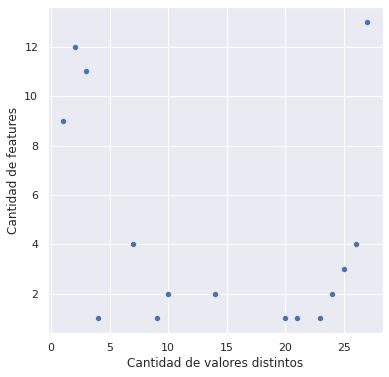

In [13]:
ax = sns.scatterplot(x=feature_count_df.index, y=feature_count_df.values)
ax.set(ylabel='Cantidad de features', xlabel='Cantidad de valores distintos')

In [14]:
df_amines_feat = pd.DataFrame({'feature':df_amines_feat.index, 'count':df_amines_feat.values})

In [20]:
continuous_feats = df_amines_feat.loc[df_amines_feat["count"]==2]
continuous_feats

,feature,count
1,_feat_fr_Imine,2
16,_feat_CarboaromaticRingCount,2
18,_feat_AliphaticRingCount,2
21,_feat_HeteroaliphaticRingCount,2
26,_feat_CyclomaticNumber,2
37,_feat_CarboRingCount,2
53,_feat_fr_NH1,2
54,_feat_fr_guanido,2
60,_feat_AromaticRingCount,2
63,_feat_CarboaliphaticRingCount,2


In [16]:
continuous_feats = df_amines_feat.loc[df_amines_feat["count"]>18]
categorical_feats = df_amines_feat.loc[df_amines_feat["count"]<5]
to_check_feats = df_amines_feat.loc[(df_amines_feat["count"]>5) & (df_amines_feat["count"] < 19)]

In [17]:
types_feat = [categorical_feats, continuous_feats, to_check_feats]
for type_feat in types_feat: print(len(type_feat))

33
25
9


#### Categorical features includes:
    - Count of H donor/acceptor
    - Size of different ring's types (carboaliphatics, heteroaliphatics, carboaromatics, aromatics, heteroaromatics, etc)
    - Number of different functional-group fragments (only amines considered in this dataset): primary, secondary, aromatic amines, etc

In [51]:
print(categorical_feats["feature"].to_list())

['_feat_HeteroaromaticRing Count', '_feat_fr_quatN', '_feat_fr_ArN', '_feat_fr_piperdine', '_feat_Accsitecount', '_feat_fr_dihydropyridine', '_feat_SmallestRingSize', '_feat_CarboRingCount', '_feat_CyclomaticNumber', '_feat_HeteroaliphaticRingCount', '_feat_fr_amidine', '_feat_RingAtomCount', '_feat_fr_NH2', '_feat_AliphaticRingCount', '_feat_CarboaliphaticRingCount', '_feat_fr_NH1', '_feat_donorcount', '_feat_AromaticRingCount', '_feat_fr_guanido', '_feat_LargestRingSize', '_feat_AromaticAtomCount', '_feat_fr_Ar_NH', '_feat_Hdonorcount', '_feat_CarboaromaticRingCount', '_feat_Hacceptorcount', '_feat_donsitecount', '_feat_AtomCount_N', '_feat_fr_pyridine', '_feat_ChiralCenterCount', '_feat_acceptorcount', '_feat_fr_piperzine', '_feat_fr_Imine', '_feat_fr_NH0']


In [52]:
print(continuous_feats["feature"].to_list())

['_feat_molsurfaceareaVDWp', '_feat_maximalprojectionsize', '_feat_MinimalProjectionArea', '_feat_minimalprojectionsize', '_feat_MaximalProjectionArea', '_feat_MolPol', '_feat_ASA_P', '_feat_msareaVDWp', '_feat_ASA', '_feat_ASA-', '_feat_MinimalProjectionRadius', '_feat_molsurfaceareaASAp', '_feat_LengthPerpendicularToTheMinArea', '_feat_WienerIndex', '_feat_ASA+', '_feat_MaximalProjectionRadius', '_feat_VanderWaalsSurfaceArea', '_feat_LengthPerpendicularToTheMaxArea', '_feat_VanderWaalsVolume', '_feat_BalabanIndex', '_feat_ASA_H', '_feat_HyperWienerIndex', '_feat_msareaASAp', '_feat_Refractivity', '_feat_AvgPol']


In [53]:
print(to_check_feats["feature"].to_list())

['_feat_RotatableBondCount', '_feat_ProtPolarSurfaceArea', '_feat_ChainAtomCount', '_feat_AtomCount_C', '_feat_PolarSurfaceArea', '_feat_WienerPolarity', '_feat_BondCount', '_feat_Aliphatic AtomCount', '_feat_Protpsa']


### Manual categorization:
    - Categorical: _feat_ProtPolarSurfaceArea', '_feat_Protpsa', _feat_PolarSurfaceArea '_feat_RotatableBondCount? -> Low, Medium_ High
    - Continuous: rest

In [36]:
for key, value in cols_name_by_count.items():
    if key < 20 and key > 5: print("Columns: {} Count:{}".format(value, key))

Columns: ['_feat_WienerPolarity', '_feat_BondCount'] Count:14
Columns: ['_feat_AtomCount_C', '_feat_ChainAtomCount', '_feat_Aliphatic AtomCount'] Count:10
Columns: ['_feat_ProtPolarSurfaceArea', '_feat_Protpsa', '_feat_RotatableBondCount'] Count:7
Columns: ['_feat_PolarSurfaceArea'] Count:8


In [70]:
df.drop(categorical_feats["feature"].to_list(), axis=1).to_csv("data/preproccess/_training.csv", index=None)

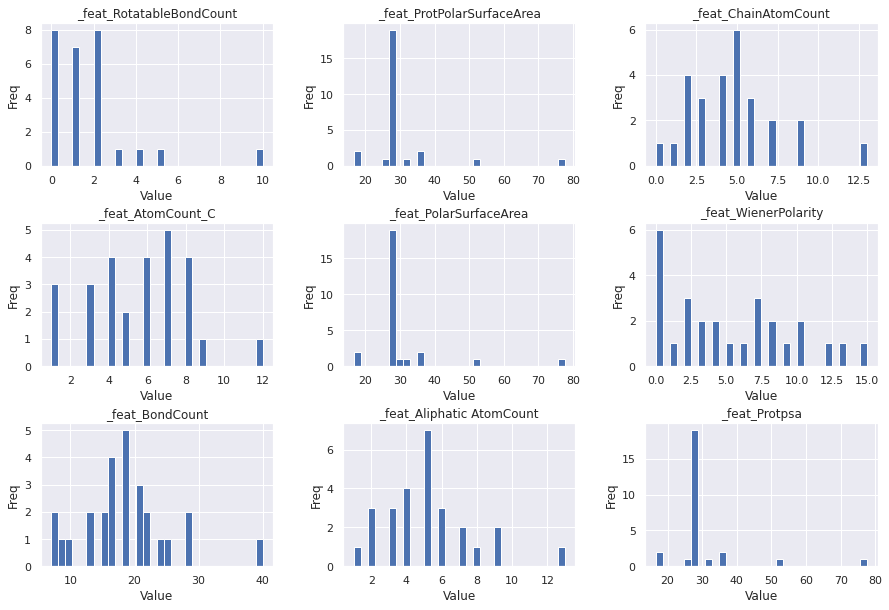

In [58]:
axs = df_amines_fcp[to_check_feats["feature"]].hist(bins=30, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

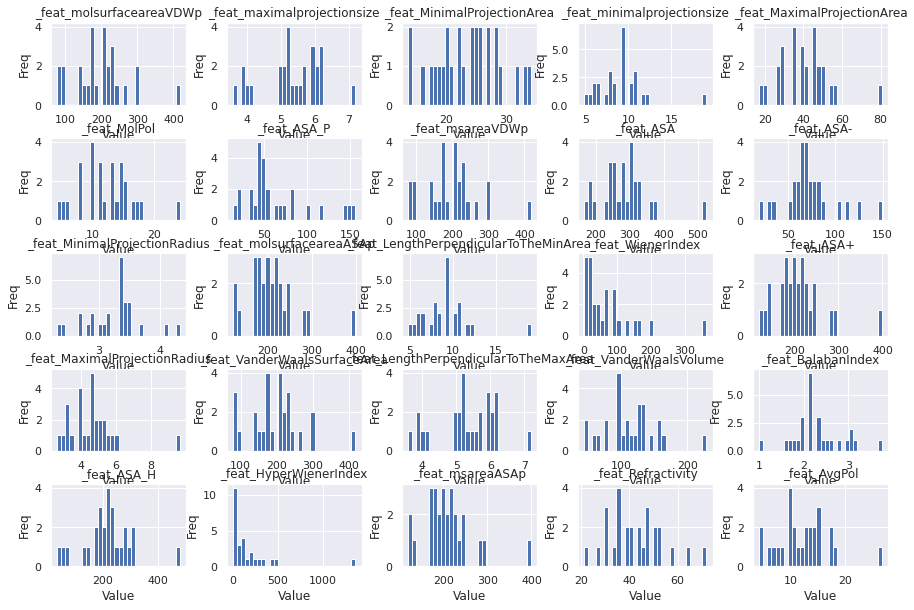

In [56]:
axs = df_amines_fcp[continuous_feats["feature"]].hist(bins=30, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Categorical plot

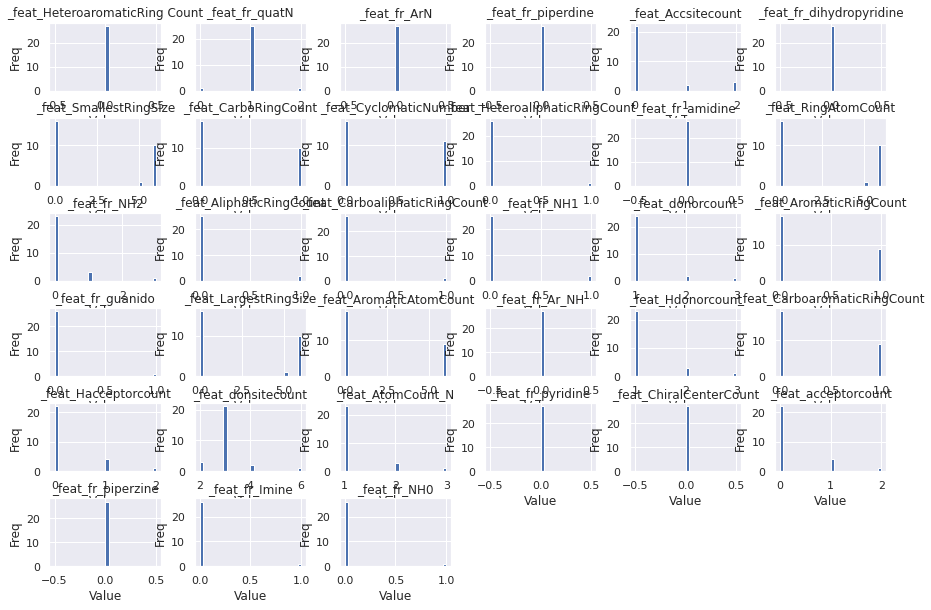

In [57]:
axs = df_amines_fcp[categorical_feats["feature"]].hist(bins=30, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Continuous variables plot

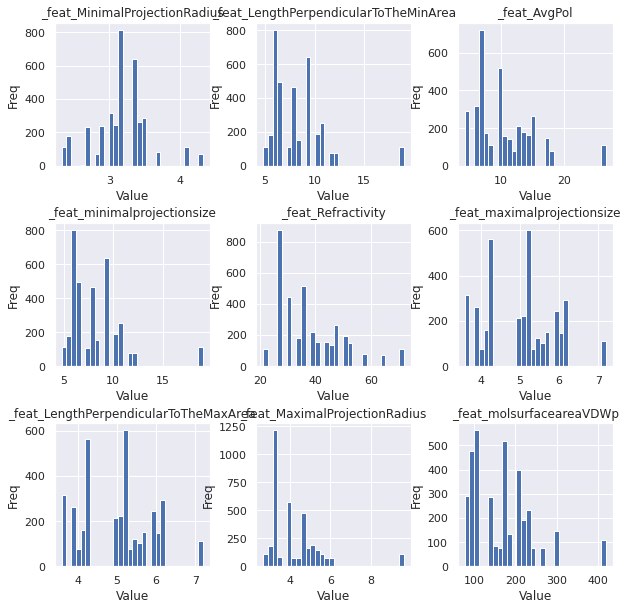

In [60]:
axs = df_amines_fcp[continuous_feats["feature"]].hist(bins=30, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Feature importance

In [115]:
importance_feat_file = 'notebooks/results/fetures_sorted_by_weight.csv'
feat_importance = pd.read_csv(importance_feat_file)

In [116]:
feat_importance.head()

,feature,weight
0,_rxn_M_organic,0.222841
1,_rxn_M_inorganic,0.202689
2,_rxn_M_acid,0.162786
3,_feat_ASA-,0.146227
4,_feat_BalabanIndex,0.026015


In [117]:
len(feat_importance)

77

In [118]:
data = {'feature': phy_chem_cols, 'count_values': unique_col_counts}
cols_count_df = pd.DataFrame.from_dict(data)
cols_count_df.head()

,feature,count_values
0,_feat_MinimalProjectionRadius,25
1,_feat_LargestRingSize,3
2,_feat_HeteroaliphaticRingCount,2
3,_feat_LengthPerpendicularToTheMinArea,28
4,_feat_fr_dihydropyridine,1


In [119]:
len(cols_count_df)

67

In [120]:
cols_count_df.dtypes

feature         object
count_values     int64
dtype: object

In [121]:
feat_importance.dtypes

feature     object
weight     float64
dtype: object

In [122]:
cols_count_df = cols_count_df.merge(feat_importance, how='left', on='feature')

In [123]:
#cols_count_df = cols_count_df.sort_values(by=['weight', 'count_values'], ascending=False)
cols_count_df.head()

,feature,count_values,weight
54,_feat_ASA-,29,0.146227
34,_feat_BalabanIndex,21,0.026015
13,_feat_CarboaliphaticRingCount,2,0.019689
50,_feat_ASA_H,29,0.014964
48,_feat_ASA,29,0.014606


In [124]:
len(cols_count_df)

67

[Text(0.5, 0, 'Peso del feature'),
 Text(0, 0.5, 'Cantidad de valores distintos del feature')]

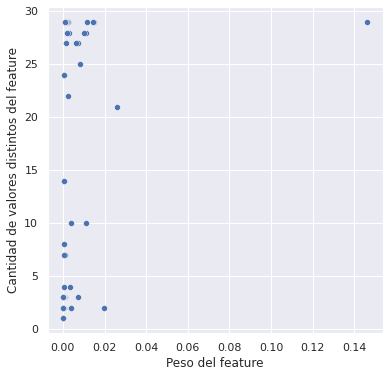

In [126]:
ax = sns.scatterplot(data = cols_count_df, x = 'weight', y='count_values')
ax.set(xlabel='Peso del feature', ylabel='Cantidad de valores distintos del feature')

In [ ]:
# aplicar tranformación